In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from scipy import ndimage

Threshold

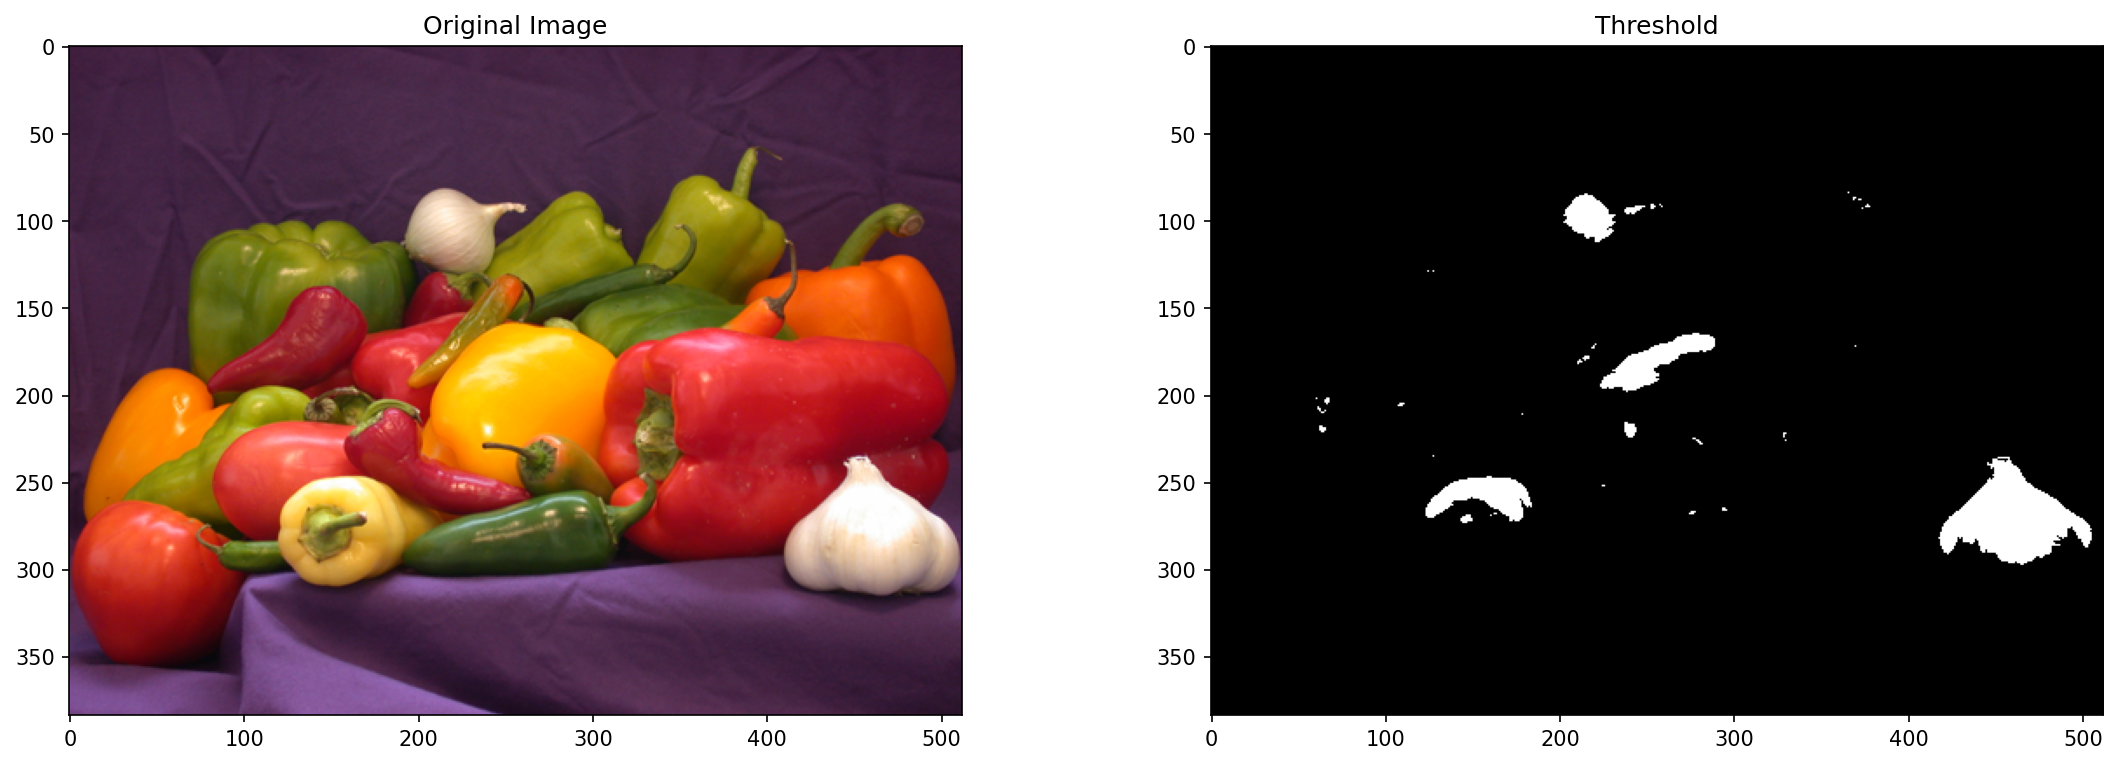

In [17]:

img = cv.imread('peppers.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
imgToProcess = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
ret,thresh1 = cv.threshold(imgToProcess,255*0.8,255,cv.THRESH_BINARY)
# ret,thresh2 = cv.threshold(img,255*0.5,255,cv.THRESH_BINARY_INV)
# ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
# ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
# ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
# ret,thresh6 = cv.threshold(img,127,255,cv.THRESH_MASK)
# ret,thresh7 = cv.threshold(img,127,255,cv.THRESH_OTSU)
# ret, thresh8 = cv.threshold(img,127,255,cv.THRESH_TRIANGLE)
titles = ['Original Image','Threshold']
images = [img, thresh1]
figure(figsize=(18, 13), dpi=150)
for i in range(2):
    plt.subplot(2,2,i+1),plt.imshow(images[i], 'gray', vmin=0, vmax=255)
    plt.title(titles[i])
    # plt.xticks([]),plt.yticks([])
plt.show()

Grayscale

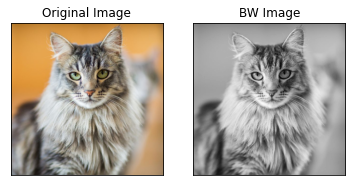

In [18]:
img = cv.imread('gato.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray_image = cv.cvtColor(img, cv.COLOR_RGB2GRAY)


titles = ['Original Image', 'BW Image', 'BW Inv Image']
images = [img, gray_image]

for i in range(2):
    plt.subplot(1, 2, i+1),plt.imshow(images[i], 'gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Roberts Edge Detection

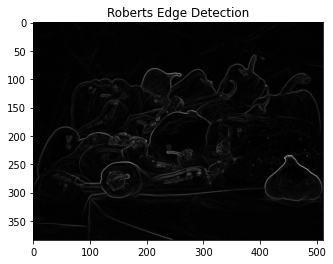

In [58]:
roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )
  
roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )
  
img = cv.imread("peppers.png",0).astype('float64')
# img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# imge = img.astype('float64')
img/=255.0
vertical = ndimage.convolve(img, roberts_cross_v)
horizontal = ndimage.convolve(img, roberts_cross_h)
  
edged_img = np.sqrt(np.square(horizontal) + np.square(vertical))
edged_img*=255
plt.subplot(1,1,1),plt.imshow(edged_img,  'gray', vmin=0, vmax=255)
plt.title('Roberts Edge Detection')
plt.show()

PASSA BAIXA MEDIANA

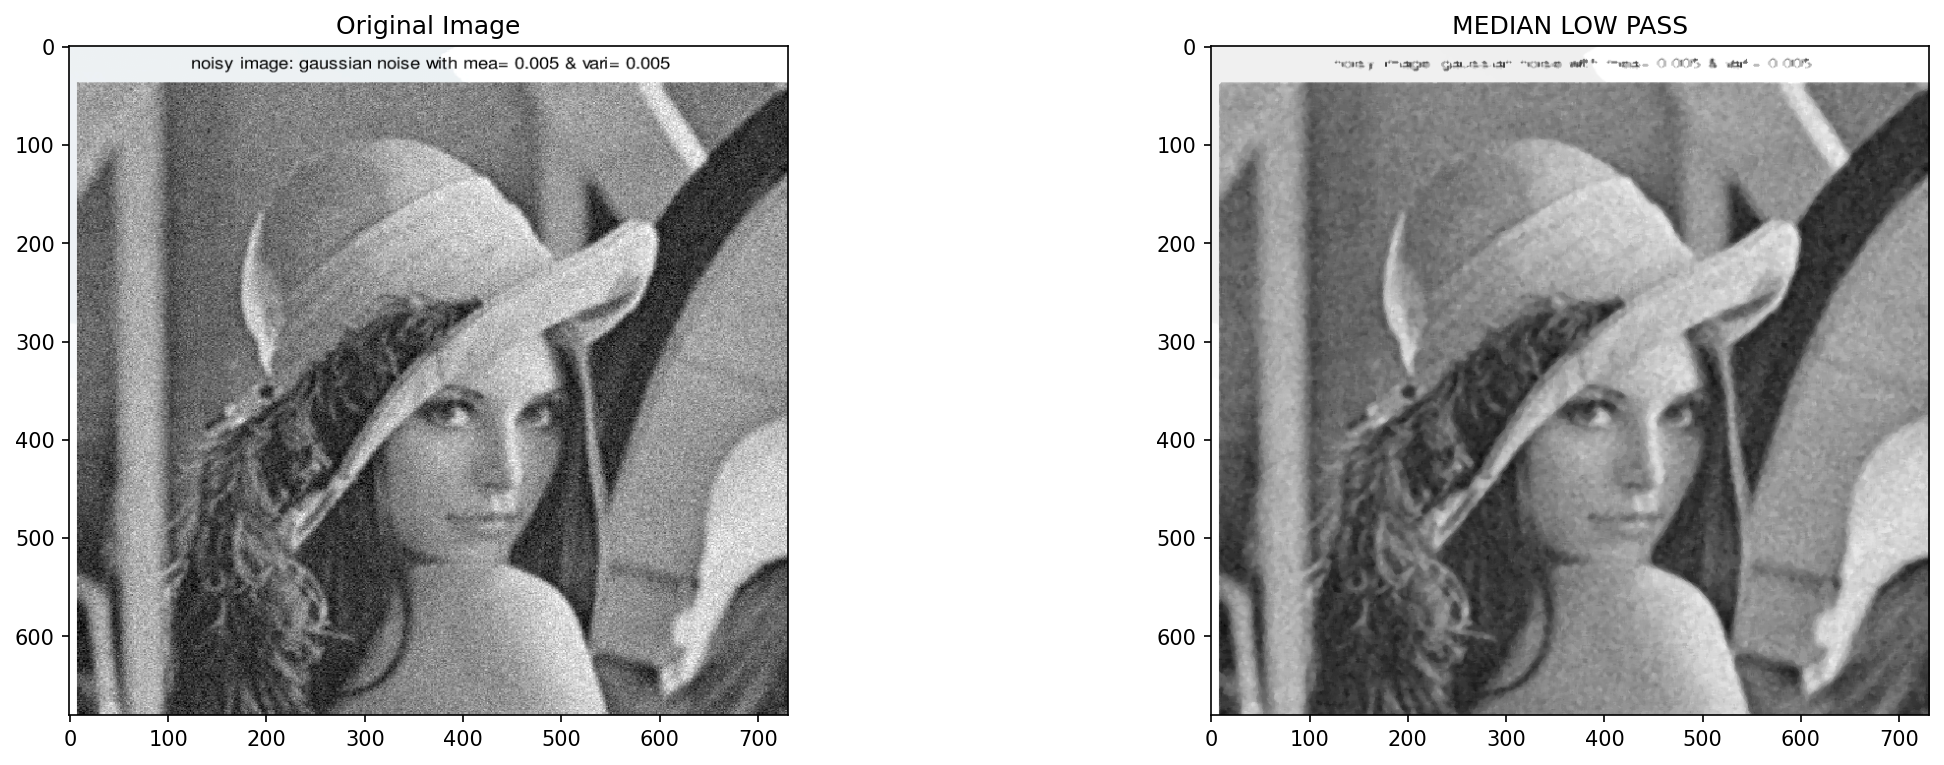

In [89]:
img = cv.imread('noise.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_as_array = np.array(img, dtype=float) / 255
# # print(img)
# h = np.array([
#     [1, 1, 1], 
#     [1, 1, 1], 
#     [1, 1, 1]])

grayImg = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
# h = h * (1/9)
# filter2d = cv.filter2D(src=img, ddepth=-1, kernel=h)

filter2d = cv.medianBlur(grayImg, 5)
# compare = np.concatenate((grayImg, filter2d), axis=1)

images = [img, filter2d]
titles = ['Original Image', 'MEDIAN LOW PASS']

figure(figsize=(18, 13), dpi=150)

for i in range(2):
    plt.subplot(2,2,i+1),plt.imshow(images[i],  'gray', vmin=0, vmax=255)
    plt.title(titles[i])
plt.show()


PASSA BAIXA BASICO

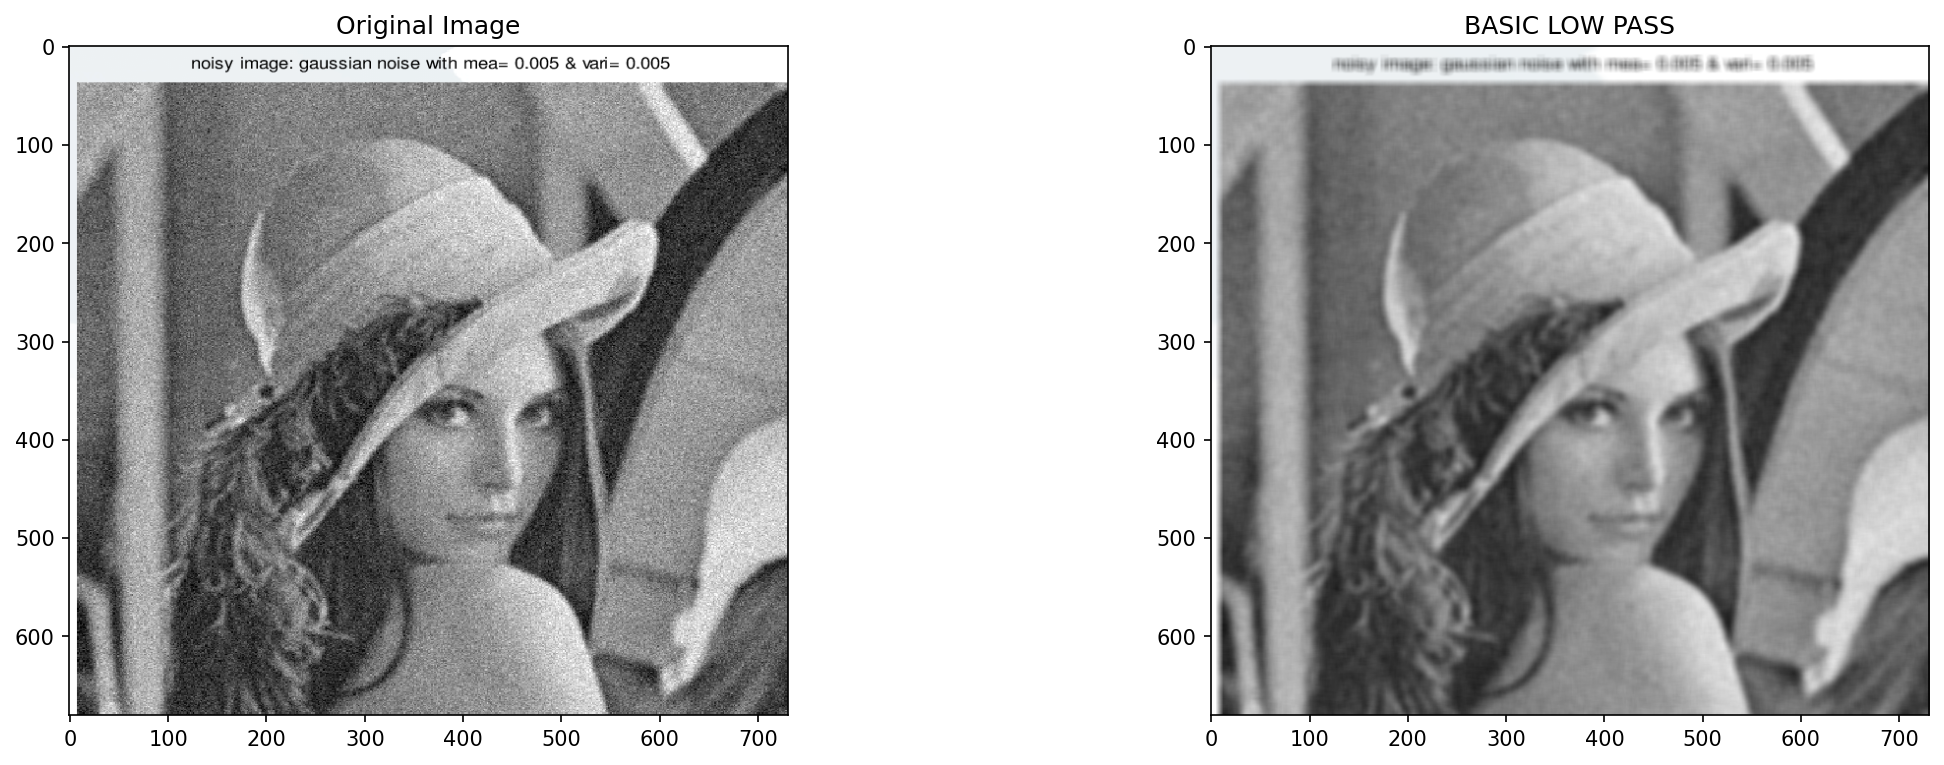

In [91]:
img = cv.imread('noise.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

x = 8

kernel = np.ones((x,x),np.float32)/(x*x)
img2 = cv.filter2D(img,ddepth=-1,kernel=kernel)

images = [img, img2]
titles = ["Original Image", "BASIC LOW PASS"]

figure(figsize=(18, 13), dpi=150)

for i in range(2):
    plt.subplot(2,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])

plt.show()

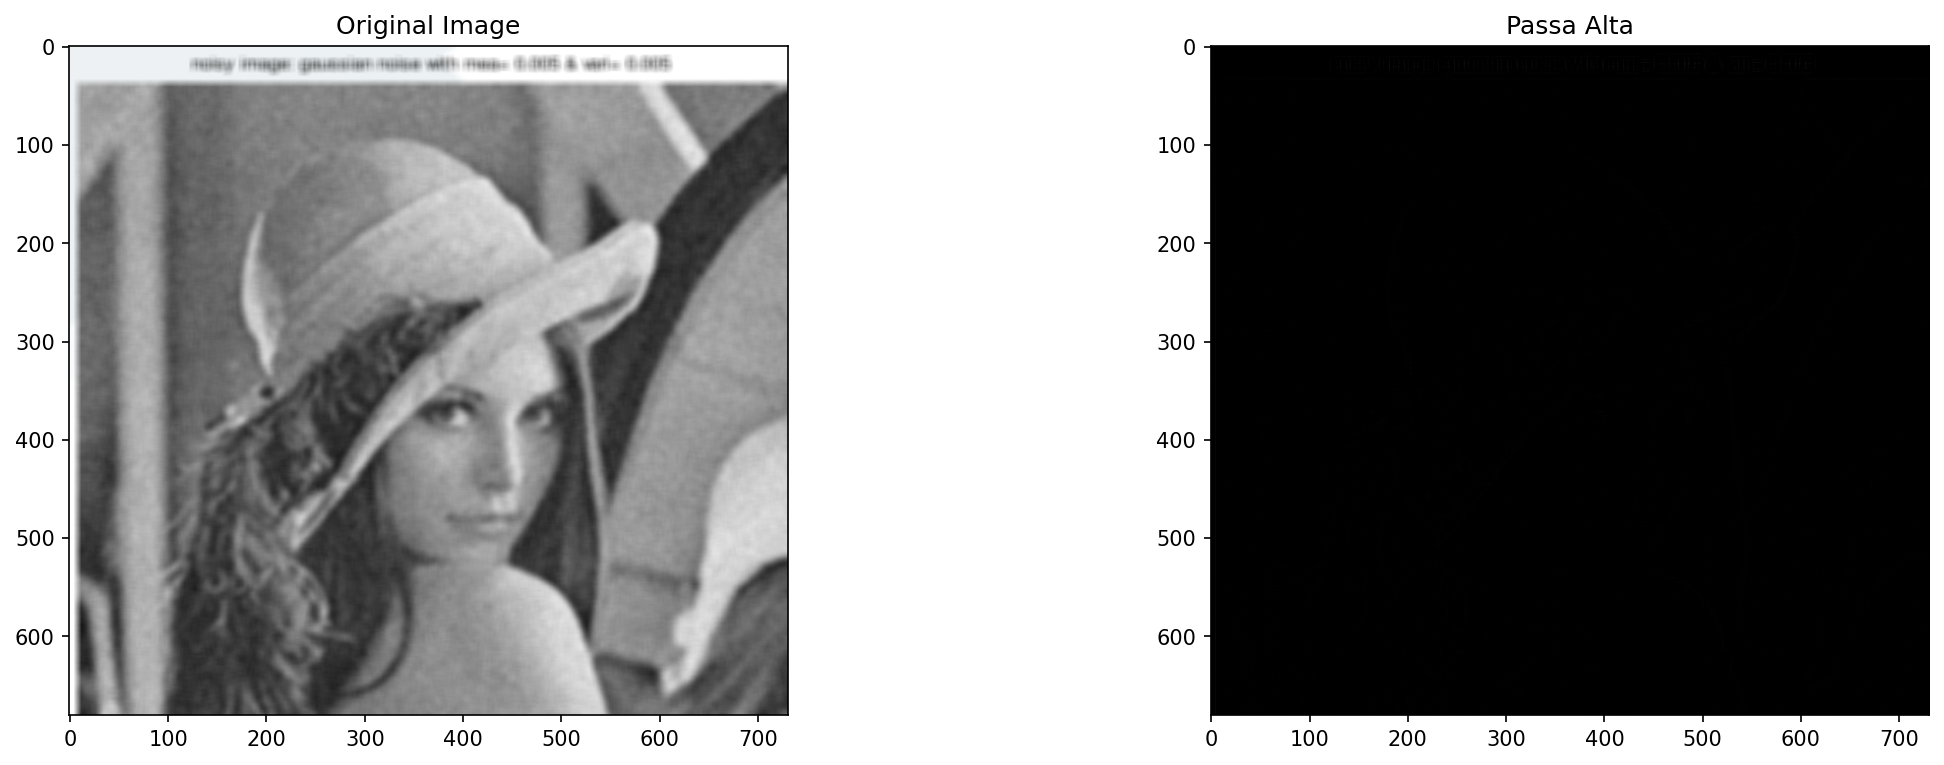

In [126]:
img = cv.imread('peppers.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#TODO

h = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1],
    ])

h = h * 1/9

passaAlta = cv.filter2D(src=img2, ddepth=-1, kernel=h)

images = [img2, passaAlta]
titles = ['Original Image', 'Passa Alta']

figure(figsize=(18, 13), dpi=150)

for i in range(2):
    plt.subplot(2,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
plt.show()


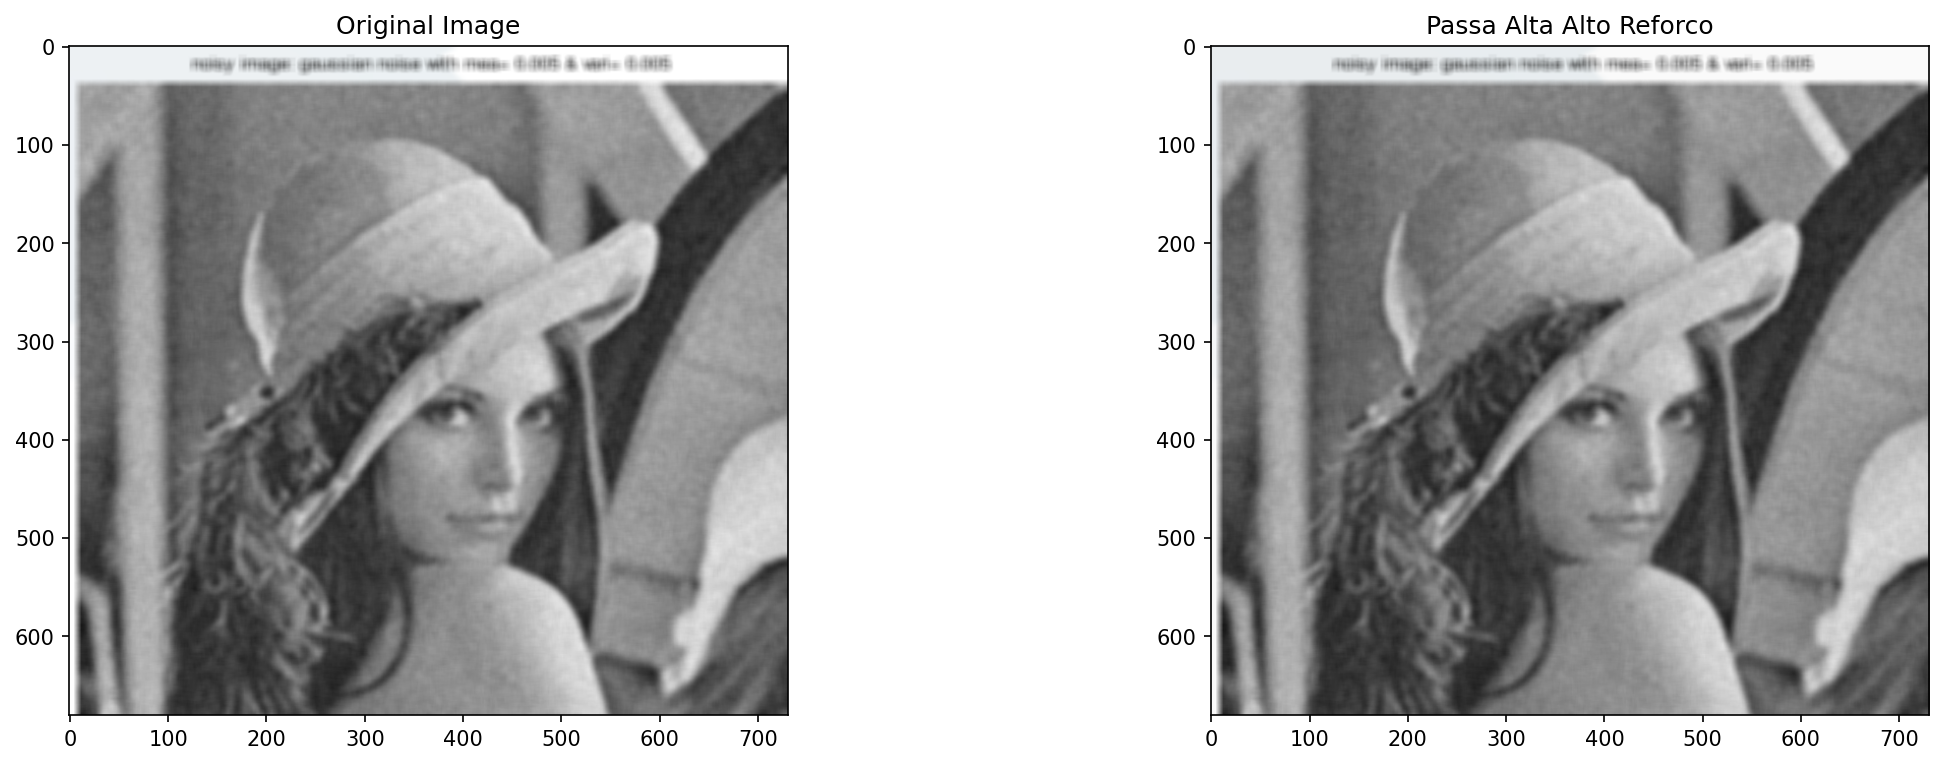

In [122]:
img = cv.imread('photo.jfif')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
#TODO

A = 50
w = 9*A - 1

h = np.array([
    [-1, -1, -1],
    [-1, w, -1],
    [-1, -1, -1],
    ])

h = h * 1/w
ar = cv.filter2D(src=img2, ddepth=-1, kernel=h)
# A = 2
# ar = (A-1) * img + passaAlta

images = [img2, ar]
titles = ['Original Image', 'Passa Alta Alto Reforco']

figure(figsize=(18, 13), dpi=150)


for i in range(2):
    plt.subplot(2,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
plt.show()

In [95]:
def highpass(img, sigma):
    return img - cv.GaussianBlur(img, (21, 21), sigma) + 127


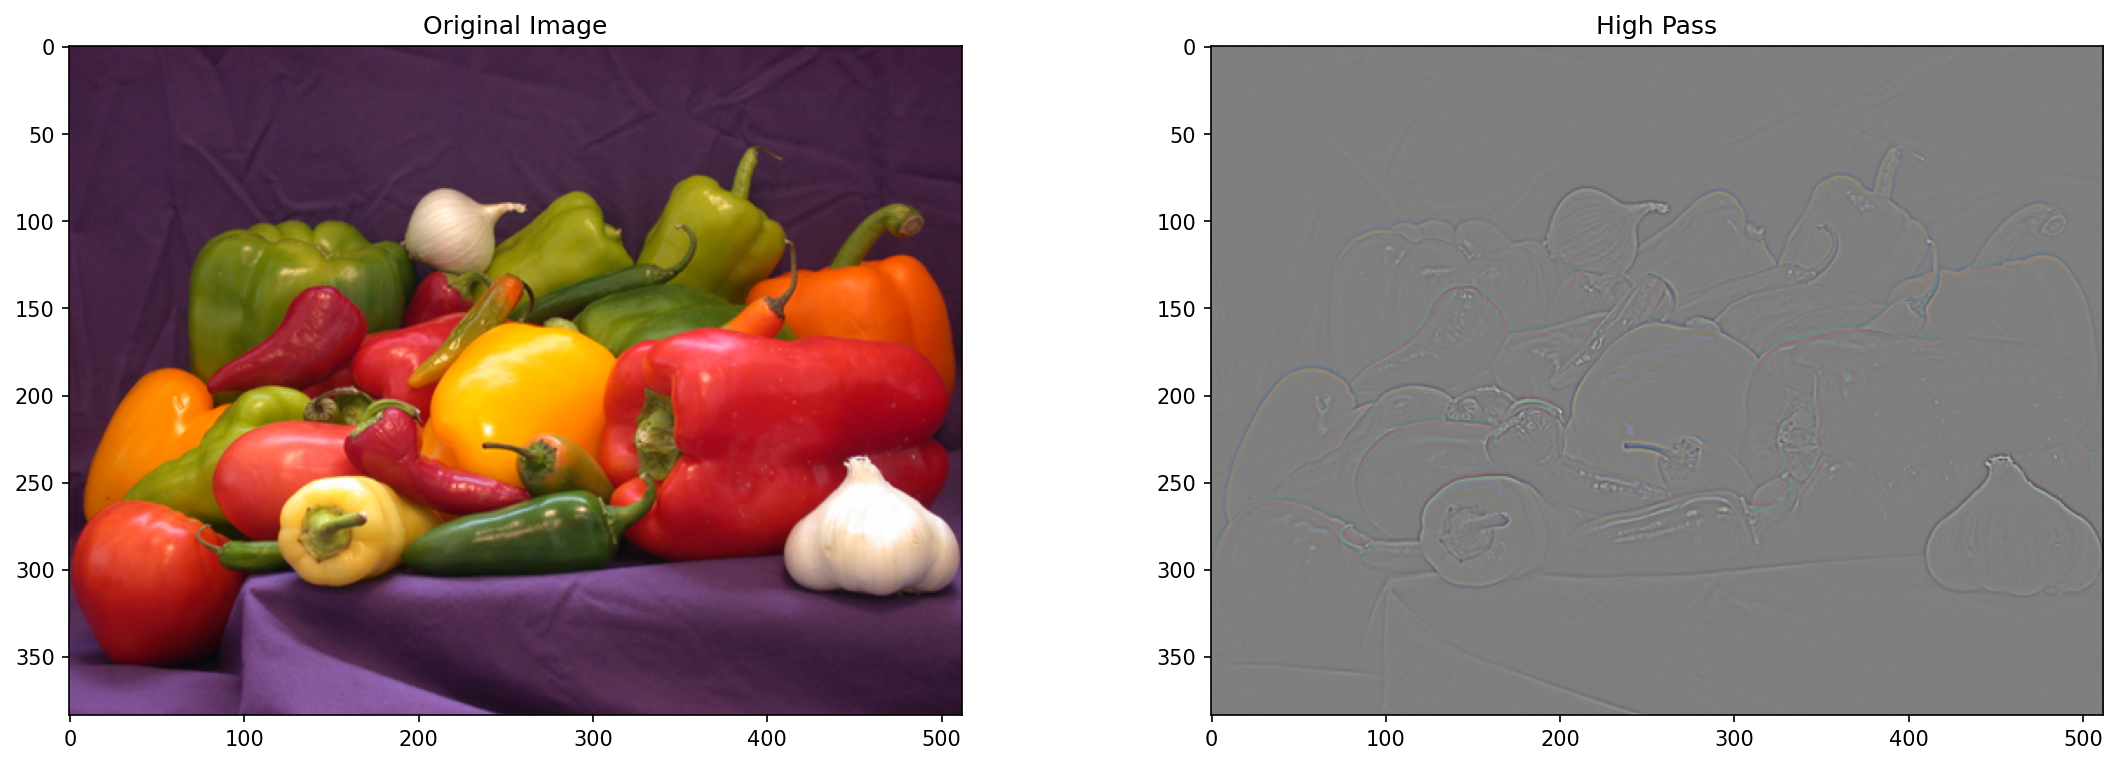

In [96]:
img = cv.imread('peppers.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
#TODO

img_result = highpass(img, 1)
# img_result = img - img2

figure(figsize=(18, 13), dpi=150)

# size = 50
# if not size%2:
#     size +=1
# kernel = np.ones((size,size),np.float32)/(size*size)
# filtered= cv.filter2D(img,-1,kernel)
# filtered = img.astype('float32') - filtered.astype('float32')
# filtered = filtered + 127*np.ones(img.shape, np.uint8)

images = [img, img_result]
titles = ['Original Image', 'High Pass']

for i in range(2):
    plt.subplot(2, 2, i+1),plt.imshow(images[i])
    plt.title(titles[i])
plt.show()

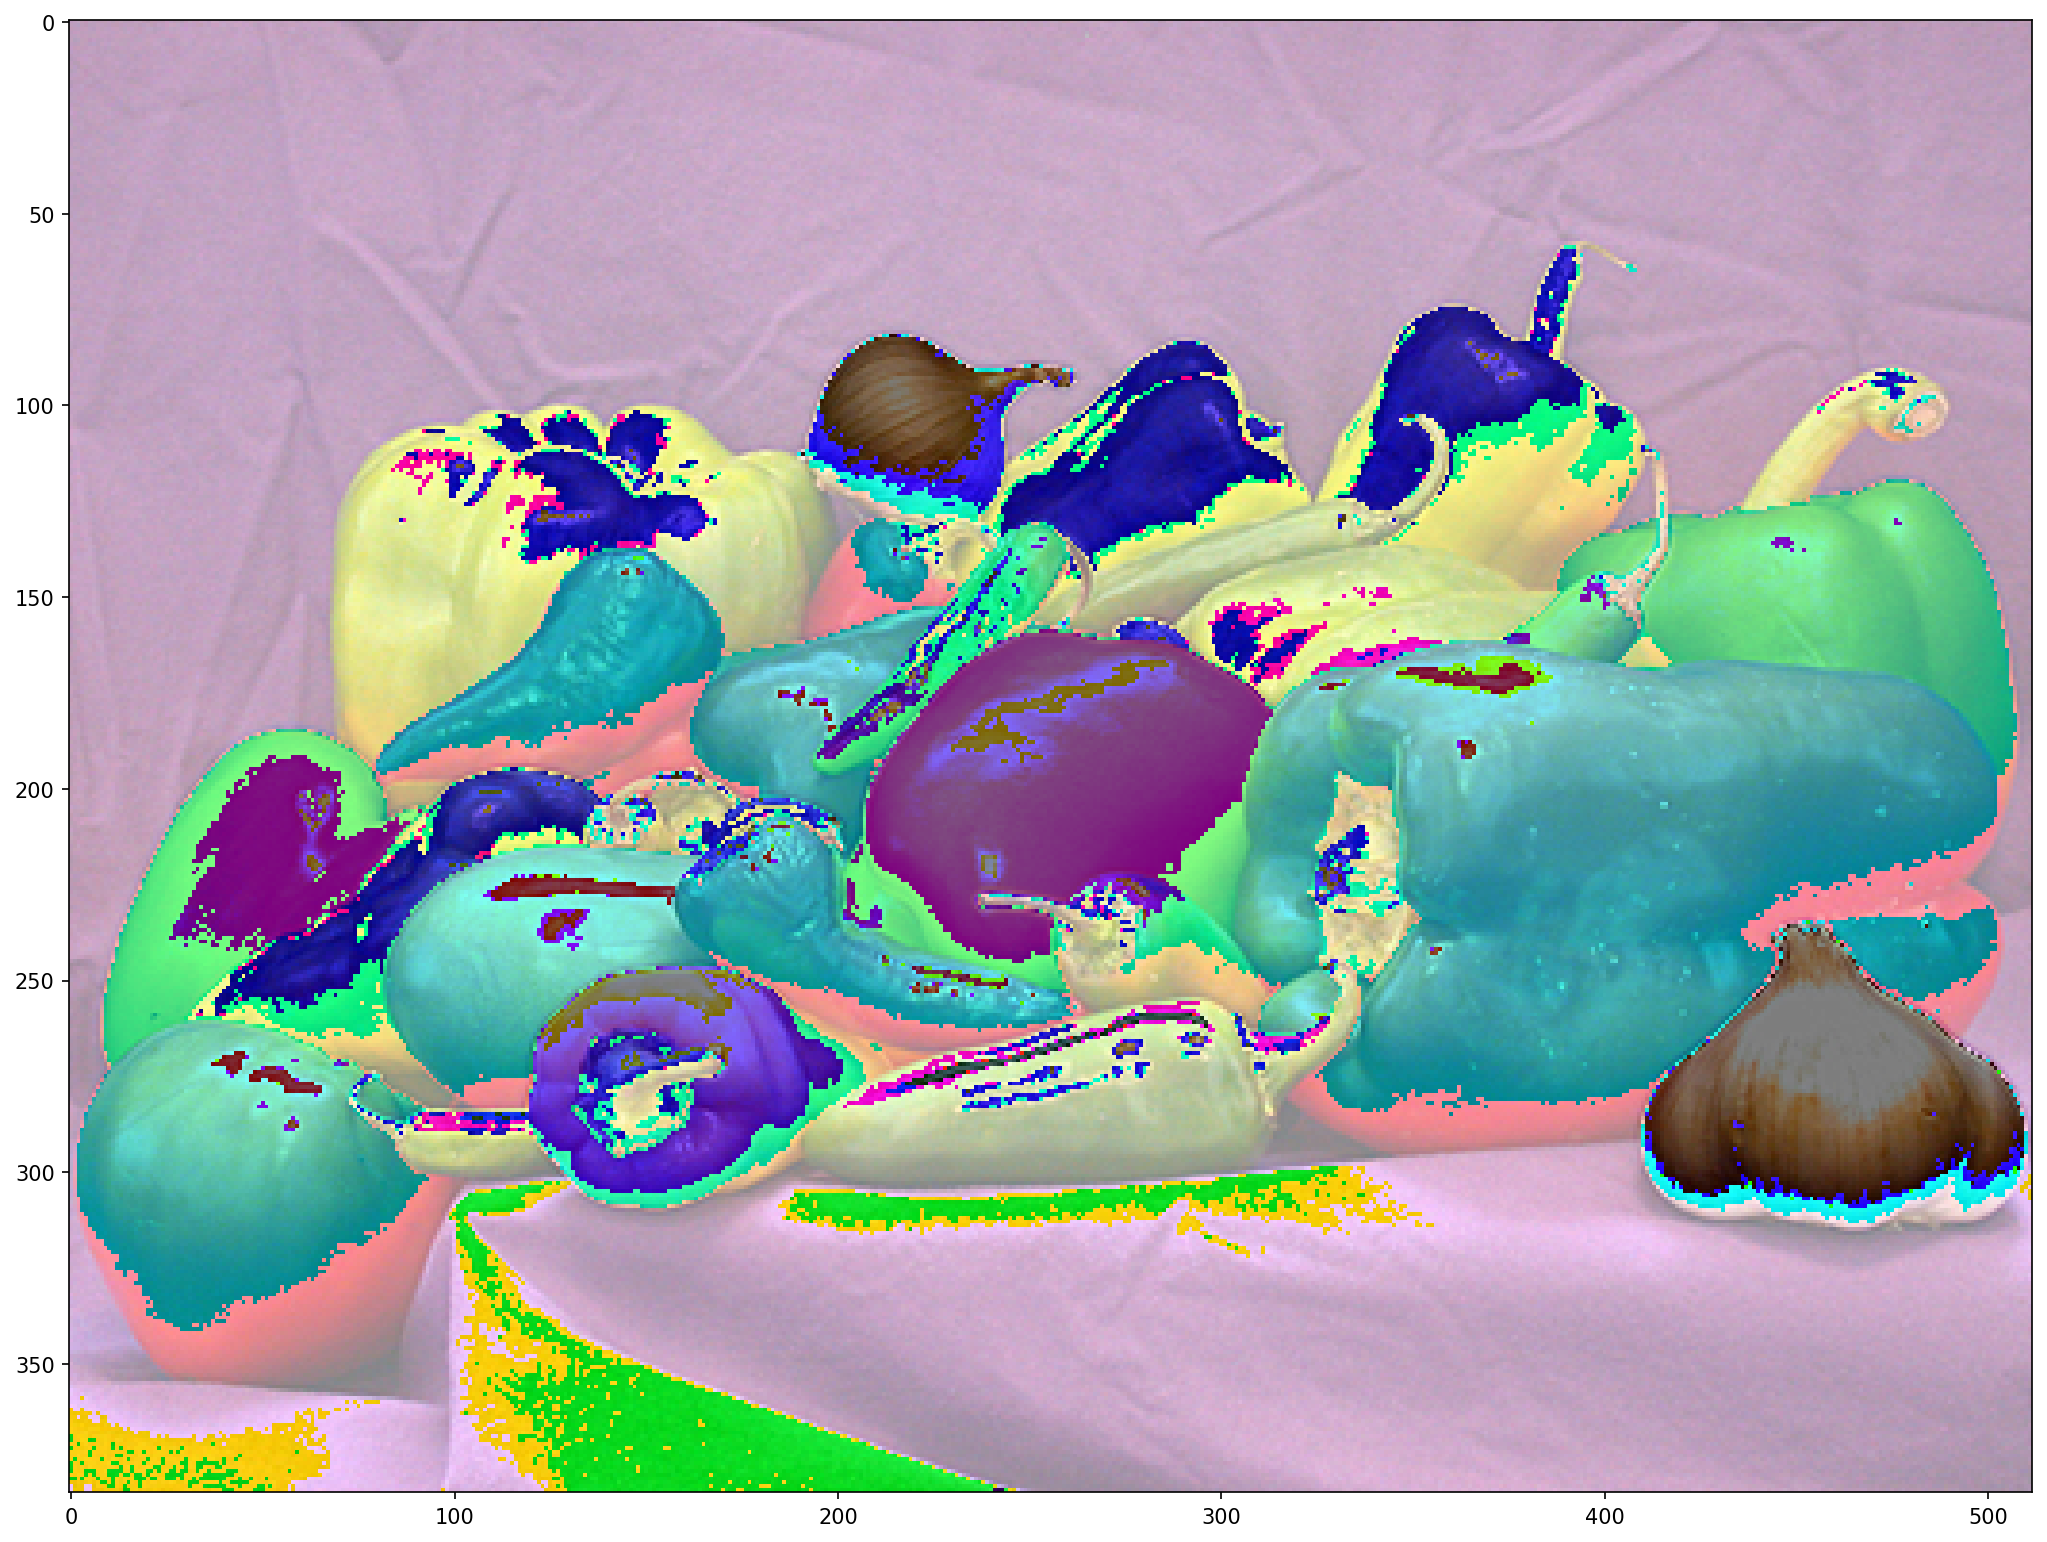

In [99]:
img = cv.imread('peppers.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

figure(figsize=(18, 13), dpi=150)

A =  2
result = (A-1) * img + img_result

plt.subplot(1,1,1),plt.imshow(result)
plt.show()